1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [36]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
%matplotlib inline
import math

Covariance Matrix:
 [[ 0.95397496  0.94712196  2.85507189]
 [ 0.94712196 10.091939   11.98618293]
 [ 2.85507189 11.98618293 17.69632672]]

Eigenvalues using eigendecomposition:
 [ 2.67866991e+01 -8.27564121e-16  1.95554153e+00]

Eigenvectors using eigendecomposition:
 [[-0.11030542 -0.81649658  0.56671514]
 [-0.58377604 -0.40824829 -0.70181113]
 [-0.80438688  0.40824829  0.43161914]]

Eigenvalues using SVD:
 [2.67986042e+01 1.95572507e+00 2.63404657e-30]

Eigenvectors using SVD:
 [[-0.11033915  0.56670857 -0.81649658]
 [-0.58373427 -0.70184588 -0.40824829]
 [-0.80441256  0.43157127  0.40824829]]
93.20% of the total dataset's variability explained by the principal components: 
By selecting the component 0 and 1, we retain 100.00% of the total variability


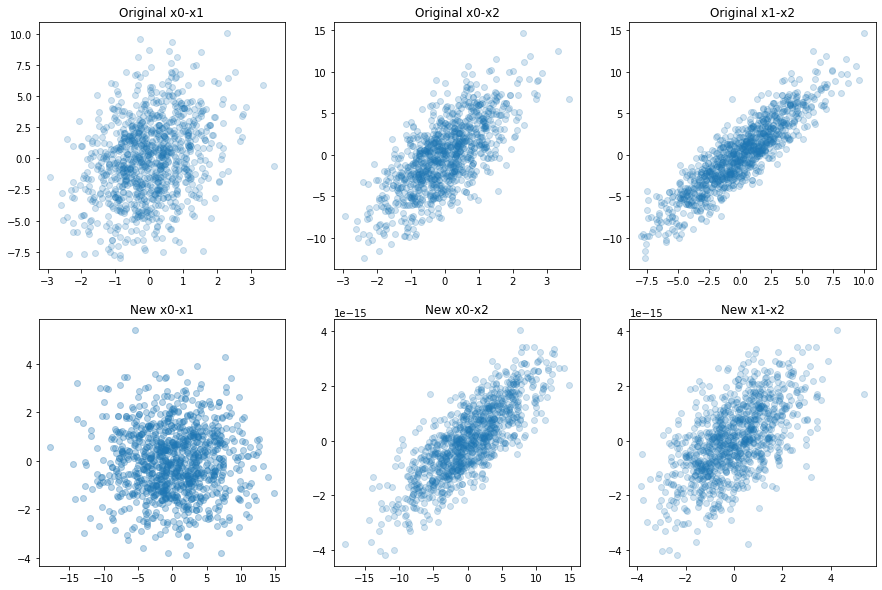

In [26]:
n = 1000
x1 = np.random.normal(0, 1, n)
x2 = x1 + np.random.normal(0, 3, n)
x3 = 2*x1 + x2

x = np.array([x1, x2, x3])

#1.Using eigendecomposition of the covariance matrix
cov = np.cov(x)
print("Covariance Matrix:\n",cov)

l, V = la.eig(cov)
l = np.real_if_close(l)
print("\nEigenvalues using eigendecomposition:\n",l)
print("\nEigenvectors using eigendecomposition:\n",V)

#2.Using SVD
U, S, Vt = np.linalg.svd(x)
l_svd = S**2/(n-1)
V_svd = U
print("\nEigenvalues using SVD:\n", l_svd)
print("\nEigenvectors using SVD:\n", V_svd)
# the above the two procedures produce to same result

#3.
lamda = np.diag(np.sort(l)[::-1])
la = (lamda[0,0]/lamda.trace())*100
variability = (((lamda[0,0]+lamda[1,1])/lamda.trace()))*100
print("%.2f%% of the total dataset's variability explained by the principal components: " %(la))
print("By selecting the component 0 and 1, we retain %.2f%% of the total variability" %(variability))

#4
U_T = U.T
xp = np.dot(U_T, x)
fig = plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
plt.title("Original x0-x1")
plt.scatter(x[0,:], x[1,:], alpha=0.2)

plt.subplot(2, 3, 2)
plt.title("Original x0-x2")
plt.scatter(x[0,:], x[2,:], alpha=0.2)

plt.subplot(2, 3, 3)
plt.title("Original x1-x2")
plt.scatter(x[1,:], x[2,:], alpha=0.2)

plt.subplot(2, 3, 4)
plt.title("New x0-x1")
plt.scatter(xp[0,:], xp[1,:], alpha=0.3)

plt.subplot(2, 3, 5)
plt.title("New x0-x2")
plt.scatter(xp[0,:], xp[2,:], alpha=0.2)

plt.subplot(2, 3, 6)
plt.title("New x1-x2")
plt.scatter(xp[1,:], xp[2,:], alpha=0.2)
plt.show()



2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Eigenvalues using eigendecomposition:
 [ 2.67874072e+01  1.95572341e+00 -1.30222212e-15  4.21132360e-02
  5.81475247e-02  4.47360841e-02  5.64433928e-02  5.48984336e-02
  5.22508983e-02  5.15966609e-02  4.75148471e-02  4.85758636e-02
  4.92178903e-02]

Eigenvectors using eigendecomposition:
 [[ 1.10304716e-01  5.66685981e-01 -8.16496581e-01  4.49783163e-04
  -4.00755425e-03 -2.25007656e-03  4.80786481e-04  3.51850258e-04
   1.65199233e-03 -1.25769016e-03 -1.88901186e-03  1.88099848e-03
   3.21611585e-04]
 [ 5.83767371e-01 -7.01788611e-01 -4.08248290e-01  1.04206400e-04
   2.41561746e-03  2.62651202e-03  1.23482545e-03 -2.44678535e-04
  -1.56495761e-03  1.96682611e-03  2.40448804e-03 -3.89781098e-03
   3.39245359e-04]
 [ 8.04376803e-01  4.31583352e-01  4.08248290e-01  1.00377273e-03
  -5.59949104e-03 -1.87364111e-03  2.19639841e-03  4.59021981e-04
   1.73902705e-03 -5.48554206e-04 -1.37353567e-03 -1.35814015e-04
   9.82468529e-04]
 [-6.38913675e-04  2.86581484e-03 -5.11226733e-17  5.575

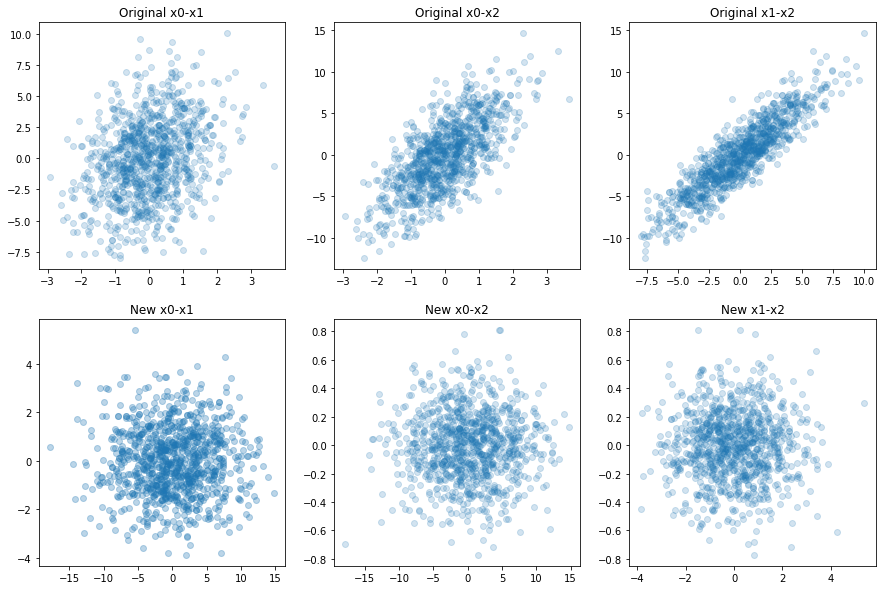

In [37]:
mu = np.zeros(10) # centered on 0
cv = np.diag(np.full(10, 1/ 20))

x_noise = np.random.multivariate_normal(mu, cv, n).T #noise
x_new = np.row_stack((x, x_noise))

# Eigenvectors and eigenvaues using eigendecomposition of the covariance matrix
cov = np.cov(x_new)
l, V = la.eig(cov)
l = np.real_if_close(l)
print("Eigenvalues using eigendecomposition:\n", l)
print("\nEigenvectors using eigendecomposition:\n", V)

U, S, Vt = np.linalg.svd(x_new)
l_svd = S**2/(n-1)
V_svd = U
print("Eigenvalues using SVD:\n", l_svd, '\n')
print("Eigenvectors using SVD:\n", V_svd, '\n')

lamda = np.diag(np.sort(l)[::-1])
la = (lamda[0,0]/lamda.trace())*100
variability = (((lamda[0,0]+lamda[1,1])/lamda.trace()))*100
print("%.2f%% of the total dataset's variability explained by the principal components: " %(la))
print("By selecting the component 0 and 1, we retain %.2f%% of the total variability" %(variability))

U_T = U.T
xp = np.dot(U_T, x_new)
fig = plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
plt.title("Original x0-x1")
plt.scatter(x_new[0,:], x_new[1,:], alpha=0.2)

plt.subplot(2, 3, 2)
plt.title("Original x0-x2")
plt.scatter(x_new[0,:], x_new[2,:], alpha=0.2)

plt.subplot(2, 3, 3)
plt.title("Original x1-x2")
plt.scatter(x_new[1,:], x_new[2,:], alpha=0.2)

plt.subplot(2, 3, 4)
plt.title("New x0-x1")
plt.scatter(xp[0,:], xp[1,:], alpha=0.3)

plt.subplot(2, 3, 5)
plt.title("New x0-x2")
plt.scatter(xp[0,:], xp[2,:], alpha=0.2)

plt.subplot(2, 3, 6)
plt.title("New x1-x2")
plt.scatter(xp[1,:], xp[2,:], alpha=0.2)
plt.show()


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [1]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

--2023-01-19 22:37:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [application/x-httpd-php]
Saving to: 'data/magic04.data'

     0K .......... .......... .......... .......... ..........  3%  156K 9s
    50K .......... .......... .......... .......... ..........  6%  297K 7s
   100K .......... .......... .......... .......... .......... 10% 23.8M 4s
   150K .......... .......... .......... .......... .......... 13% 46.3M 3s
   200K .......... .......... .......... .......... .......... 17%  300K 3s
   250K .......... .......... .......... .......... .......... 20% 16.2M 3s
   300K .......... .......... .......... .......... .......... 24% 19.1M 2s
   350K .......... .......... .......... .......... .......... 27% 69.0M 2s
  